In [3]:
import pandas as pd


data = pd.read_csv("zoo.csv")
data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
animal_name    101 non-null object
hair           101 non-null int64
feathers       101 non-null int64
eggs           101 non-null int64
milk           101 non-null int64
airborne       101 non-null int64
aquatic        101 non-null int64
predator       101 non-null int64
toothed        101 non-null int64
backbone       101 non-null int64
breathes       101 non-null int64
venomous       101 non-null int64
fins           101 non-null int64
legs           101 non-null int64
tail           101 non-null int64
domestic       101 non-null int64
catsize        101 non-null int64
class_type     101 non-null int64
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


[1 2 3 4 5 6 7]


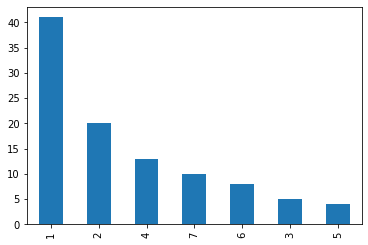

In [6]:
import numpy as np
labels = data['class_type']
print(np.unique(labels.values))

from matplotlib import pyplot as plot
%matplotlib inline
fig, ax = plot.subplots()
(labels.value_counts()).plot(ax=ax, kind='bar')

In [7]:
data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [8]:
features=data.values[:,1:-1]

features.shape

(101, 16)

In [9]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

model = AgglomerativeClustering(n_clusters=5,
                                    linkage="average", affinity="cosine")

In [10]:
model.fit(features)

AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=5,
                        pooling_func='deprecated')

In [11]:
model.labels_

array([2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 1, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 4, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 1, 2, 2, 4, 3, 0, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 3, 2], dtype=int64)

In [12]:
print(np.unique(model.labels_))

[0 1 2 3 4]


In [15]:
labels = labels - 1
print(labels.value_counts())
labels

0    41
1    20
3    13
6    10
5     8
2     5
4     4
Name: class_type, dtype: int64


0      0
1      0
2      3
3      0
4      0
      ..
96     0
97     5
98     0
99     6
100    1
Name: class_type, Length: 101, dtype: int64

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
score = mean_squared_error(labels,model.labels_)

In [18]:
abs_error = np.sqrt(score)
print(abs_error)

2.3399246835640835


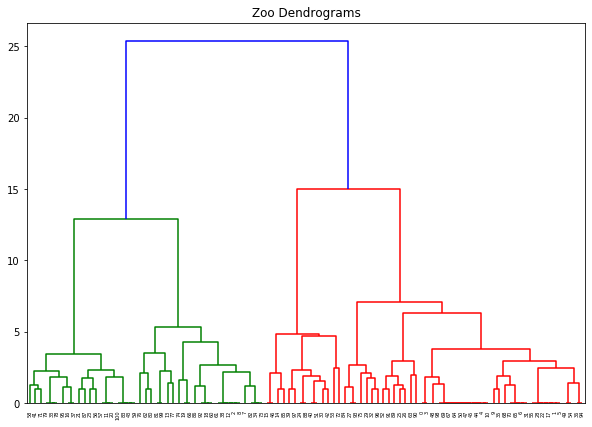

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline 
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title('Zoo Dendrograms')
dend = shc.dendrogram(shc.linkage(features,method='ward'))